A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.



The company wants to know:

1)Significant Predictor Variables
2)Effectiveness in predicting the price of houses

 


 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing Machine Learning Packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

#Avoid warnigs 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

###DATA EXPLORATION

In [3]:
# Reading and inspecting the dataframe

company_data = pd.read_csv("train.csv")
company_data.head()
company_data.describe()
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#nullvalues within the column 
company_data.isnull().sum()
round(100*company_data.isnull().sum()[(company_data.isnull().sum()>0)]/len(company_data),2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [5]:
#Removing columns with a lot of nullvalues- greater than 80%
company_data.drop(["Alley","Fence","PoolQC","MiscFeature"], axis = 1, inplace = True)
company_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
#Null values can create problems so let's impute them 
#Based on urban design/ architectural studies, 'miscellaneous' might not be heavy contributers to prices 


company_data['FireplaceQu'] = company_data['FireplaceQu'].fillna('No_Fireplace')
company_data['GarageYrBlt'] = company_data['GarageYrBlt'].fillna(0)
company_data['MasVnrType'] = company_data['MasVnrType'].fillna('None')
company_data['MasVnrArea'] = company_data['MasVnrArea'].fillna(0)
company_data['BsmtCond'] = company_data['BsmtCond'].fillna('No_Basement')
company_data['GarageType'] = company_data['GarageType'].fillna('No_Garage')



#Dropping the irrelevant columns

company_data.drop ("Electrical", axis = 1, inplace = True)
company_data.drop ("LotFrontage", axis = 1, inplace = True)

#Basement Finishes and exposure, and Garage types would not affect us
company_data.drop ("GarageFinish", axis = 1, inplace = True)
company_data.drop ("GarageQual", axis = 1, inplace = True)
company_data.drop ("GarageCond", axis = 1, inplace = True)

company_data.drop ("BsmtFinType1", axis = 1, inplace = True)
company_data.drop ("BsmtFinType2", axis = 1, inplace = True)
company_data.drop ("BsmtExposure", axis = 1, inplace = True)
company_data.drop ("BsmtQual", axis = 1, inplace = True)









In [ ]:


company_data.info()

### EXPLORATORY DATA ANALYSIS

In [ ]:
#Building a scatter plot 

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'LotArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(company_data[cols], size = 2.5)
plt.show();

In [ ]:
#Building a heatmap
plt.subplots(figsize=(12, 9))
sns.heatmap(company_data.corr(),  square=True);
plt.title("Correlation matrix ")

In [8]:
company_data.shape

(1460, 68)

In [9]:
correlation_matrix = company_data.corr()
print(correlation_matrix)

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
MasVnrArea    -0.051071    0.023573  0.103321     0.407252    -0.125694   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496  

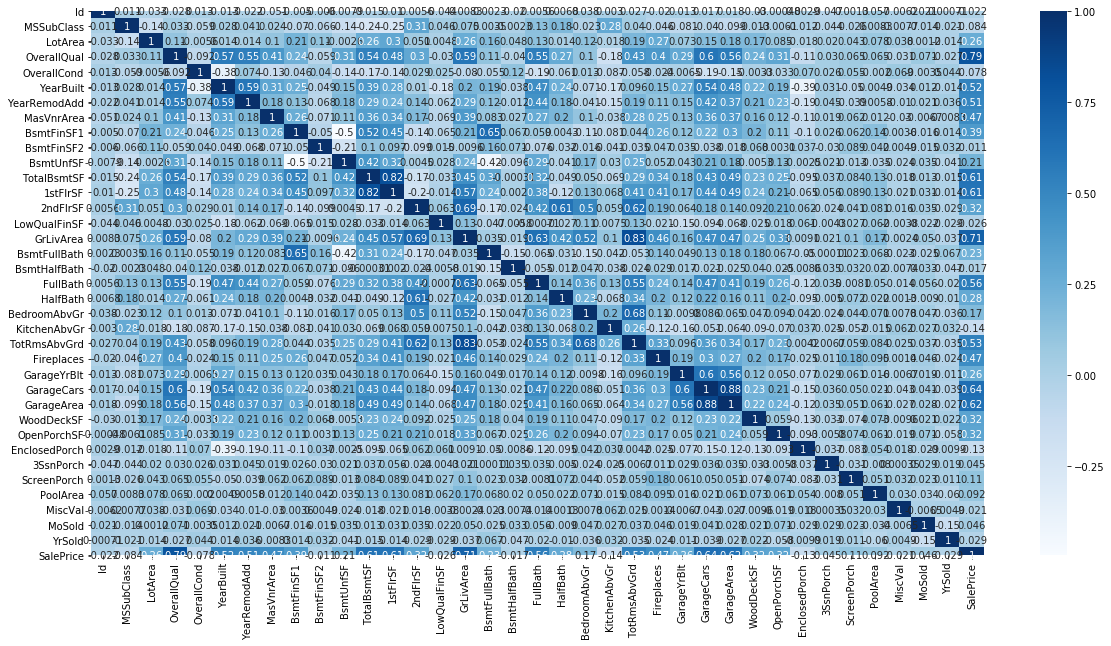

In [12]:
plt.figure (figsize = (20,10))
sns.heatmap(company_data.corr(), annot = True, cmap = "Blues")
plt.show()

CLEANING UP OF THE DATA: PREPARATION

In [13]:
continuous = company_data.select_dtypes(include = ['float64','int64'])
continuous.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
#Converting a Binary varible into numeric datatypes
#Convering categorical variables into its respective types
# mapping it to 0 and 1
company_data['Street'] = company_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
company_data['CentralAir'] = company_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)                              
company_data['PavedDrive'] = company_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)     
categorical= company_data.select_dtypes(include=['object'])
dummyvariables = pd.get_dummies(categorical,drop_first = True)


In [15]:
dummyvariables.head()
finaldata = company_data.drop(['Id'], axis = 1)

In [17]:
finaldata = finaldata.drop(list(categorical.columns), axis = 1)
finaldata = pd.concat ([finaldata,dummyvariables], axis = 1)

#THE FAMOUS TRAIN TEST SPLIT. Let's invoke the most famous machine learning step; 

finaldata_train,finaldata_test = train_test_split(finaldata, train_size=0.7,test_size = 0.3, random_state=100)

y_train = np.log(finaldata_train.SalePrice)
X_train = finaldata_train.drop ("SalePrice",1)

y_test = np.log(finaldata_test.SalePrice)
X_test = finaldata_test.drop ("SalePrice",1)



KeyError: "['MSZoning' 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'\n 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'\n 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType'\n 'ExterQual' 'ExterCond' 'Foundation' 'BsmtCond' 'Heating' 'HeatingQC'\n 'KitchenQual' 'Functional' 'FireplaceQu' 'GarageType' 'SaleType'\n 'SaleCondition'] not found in axis"

In [18]:
continuousvariables = X_train.select_dtypes (include = ['int64','float64']).columns

#Scaling the data. Inorder to ensure faster gradient descents, and optimization

scaler = StandardScaler()

#We use the function fit_transform to change the data and fit it within the 0-1 range
X_train [continuousvariables] = scaler.fit_transform(X_train[continuousvariables])

#Do not perform the fit transform on the test data because we dont want any fitting on the test data. 
#Fitting is to be done only on the train data
X_test [continuousvariables] = scaler.transform (X_test[continuousvariables])

###MODEL BUILDING

In [19]:
#RECURISVE FEATURE ELIMINATION 

lm = LinearRegression()
lm.fit(X_train, y_train)

#running RFE 
rfe = RFE (lm, 50)
rfe = rfe.fit(X_train,y_train)

In [20]:
y_Linear_Predict = lm.predict (X_train)
print(r2_score(y_train, y_Linear_Predict))
RSS = np.sum(np.square(y_train- y_Linear_Predict))
MSE = mean_squared_error (y_train, y_Linear_Predict)
print(RSS,MSE)

0.954877721536338
7.24177564829077 0.007092826296073232


Text(0.5, 0, 'Errors')

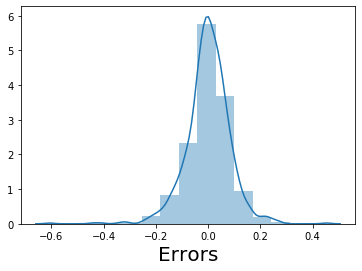

In [23]:
#Checking the Error term of the residuals, as learnt in ML-1 module
y_Linear_Predict = lm.predict(X_train)
residuals = y_train - y_Linear_Predict 

#The Error terms must be normally distributed 
fig = plt.figure()
sns.distplot((residuals), bins = 15)
plt.xlabel ('Errors', fontsize = 20)


In [ ]:
#ASsign the columns selected by the RFE 

columns = X_train.columns[rfe.support_]

#Assign the features selected 
rfe

In [26]:
## Building a Regression model. SciKit Learn Way! As we learnt in Simple Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)

# Calculating the RFE
rfe = RFE(reg, 40)
rfe = rfe.fit(X_train, y_train)
col=X_train.columns[rfe.support_]
shortened_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
shortened_df = shortened_df.loc[shortened_df['rfe_support'] == True]
shortened_df.reset_index(drop=True, inplace=True)

shortened_df

,Features,rfe_support,rfe_ranking
0,OverallQual,True,1
1,OverallCond,True,1
2,YearBuilt,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,GarageYrBlt,True,1
9,MSZoning_FV,True,1


In [27]:
# Assign the features
X_train_shortened = X_train[col]

X_train = X_train_shortened[X_train_shortened.columns]
X_test =  X_test[X_train.columns]

### RIDGE REGRESSION 
Ridge Regression is a method of optimization that adds a penalty to the given model, thereby penalizing models with a lot of features with a higher penalty

In [28]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [29]:
print(model_cv.best_params_)

{'alpha': 0.01}


In [31]:
ridgemodel = Ridge (alpha = 0.01)
ridgemodel.fit(X_train,y_train)
print(ridgemodel.coef_)



[ 0.10823213  0.05835704  0.08232605  0.05458301  0.05764364  0.05974724
  0.06873168  0.08250766  0.46860968  0.35707176  0.37267417  0.40076871
  0.31694921  0.10114232 -0.17233643  0.05622592 -1.86708079 -0.15371248
  0.0742177   2.88839823  3.08781029  3.00994928  2.78941881  3.05470357
  2.74095033  3.03826204 -0.06529784 -0.36737131  0.07589214 -0.06529784
 -0.0914003   0.10541179  0.14328354  0.13602309 -0.58029401  0.05897043
  1.91777658  0.10226063  0.12351828  0.08449771]


In [55]:
#R2, RSS, MSE
y_pred_train = ridgemodel.predict(X_train)
y_pred_test = ridgemodel.predict(X_test)

r2_test_linear = r2_score(y_test, y_pred_test)
#print("r2 test results:")
print(r2_test_linear)

mse_test_linear = mean_squared_error(y_test , y_pred_test)
print("MSE Test:")
print(mse_test_linear)

rss_linear = np.sum(np.square(y_test-y_pred_test))
print("RSS Test:")
print(rss_linear)

0.8366998426636565
MSE Test:
0.02686942691716435
RSS Test:
11.768808989717986


In [37]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,0.1337
1,OverallCond,0.0578
2,YearBuilt,0.1037
3,BsmtFinSF1,0.0320
4,TotalBsmtSF,0.0247
5,1stFlrSF,0.0410
6,2ndFlrSF,0.0332
7,GrLivArea,0.0996
8,GarageYrBlt,0.0437
9,MSZoning_FV,0.1793


In [39]:
#getting top 10 parameters from ridge
model_finalfeatures = list(ridge.coef_)
model_finalfeatures.insert(0,ridge.intercept_)
columns = X_train[ridge_df.Features]
ridge_coef = pd.DataFrame(list(zip(columns,model_finalfeatures)))

ridge_coef.columns = ['Feaure','Coef']
ridge_coef.head()


,Feaure,Coef
0,OverallQual,11.268590
1,OverallCond,0.133731
2,YearBuilt,0.057805
3,BsmtFinSF1,0.103741
4,TotalBsmtSF,0.032050


## LASSO REGRESSION

In [40]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8500546470466815
0.8671280021495842


In [41]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [42]:
print(lasso_model_cv.best_params_)
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
lasso.coef_

{'alpha': 0.0001}


array([ 1.17274969e-01,  5.89519708e-02,  1.01315870e-01,  4.79060245e-02,
        4.79215648e-02,  4.60804110e-02,  4.82734030e-02,  1.01511755e-01,
        2.16217921e-02,  2.72704763e-01,  2.93256217e-01,  3.25256253e-01,
        2.39005382e-01,  1.35451443e-01, -1.75194540e-01,  6.28163659e-02,
       -1.71474567e+00, -3.36493202e-02,  7.34913066e-02,  2.20780768e+00,
        2.28154976e+00,  2.21696992e+00,  2.02843623e+00,  2.31791514e+00,
        2.02432869e+00,  2.34904769e+00, -6.02049259e-02, -2.97377561e-01,
        7.00324001e-02, -1.46635624e-03, -2.71167045e-02,  6.16895561e-02,
        8.42132030e-02,  5.19660475e-02, -4.34640378e-01,  5.66997331e-02,
        0.00000000e+00,  6.10334950e-02,  9.65751170e-02,  7.91518631e-02])

In [43]:
#checking for the alpha 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8500546470466815
0.8671280021495842


In [56]:
#R2 and MSE Values
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


r2_test_linearreg = r2_score(y_test, y_pred_test)
#print("r2 test results:")
print(r2_test_linearreg)

mse_test_linearreg = mean_squared_error(y_test , y_pred_test)
print("MSE Test:")
print(mse_test_linearreg)

rss_linearreg = np.sum(np.square(y_test-y_pred_test))
print("RSS Test:")
print(rss_linearreg)

0.8671280021495842
MSE Test:
0.021862774009616916
RSS Test:
9.57589501621221


In [ ]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

In [50]:
#getting features
lasso_features= list(lasso.coef_)
lasso_features.insert(0,lasso.intercept_)
columns = X_train.columns
columns.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(columns,lasso_features)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,OverallQual,11.903835
1,OverallCond,0.138710
8,GarageYrBlt,0.135113
3,BsmtFinSF1,0.106048
12,MSZoning_RM,0.096663
14,Neighborhood_BrDale,0.086504
16,Condition2_PosN,0.074766
2,YearBuilt,0.057618
36,GarageType_No_Garage,0.054227
29,Exterior2nd_AsphShn,0.051525


In [51]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,OverallQual,0.1387
1,OverallCond,0.0576
2,YearBuilt,0.1060
3,BsmtFinSF1,0.0282
4,TotalBsmtSF,0.0251
5,1stFlrSF,0.0115
6,GrLivArea,0.1351
7,GarageYrBlt,0.0234
8,MSZoning_RL,0.0967
9,LandSlope_Sev,0.0865


In [52]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [54]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Top 10 Features

lassotemp = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lassotemp = lassotemp.loc[lassotemp['rfe_support'] == True]
lassotemp.reset_index(drop=True, inplace=True)
lassotemp['Coefficient'] = lassotemp['Features'].apply(find)
lassotemp = lassotemp.sort_values(by=['Coefficient'], ascending=False)
lassotemp = lassotemp.head(10)
lassotemp

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.138710
5,GrLivArea,True,1,0.135113
2,YearBuilt,True,1,0.106048
6,MSZoning_RL,True,1,0.096663
7,LandSlope_Sev,True,1,0.086504
9,Neighborhood_Somerst,True,1,0.074766
1,OverallCond,True,1,0.057618
13,FireplaceQu_Gd,True,1,0.054227
12,Exterior1st_BrkFace,True,1,0.051525
14,SaleCondition_Partial,True,1,0.028576


## COMPARING THE RESLULTS OF RIDGE AND LASSO 

The Ridge and Lasso Regression 

RIDGE:
R squared
0.8366998426636565
MSE Test:
0.02686942691716435
RSS Test:
11.768808989717986

LASSO:
R squared
0.8671280021495842
MSE Test:
0.021862774009616916
RSS Test:
9.57589501621221

#### LASSO REGRESSION HAS COME OUT TRIUMPHANT! 

0	OverallQual
1	GrLivArea
2	YearBuilt	
3	MSZoning_RL	
4	LandSlope_Sev	
5	Neighborhood_Somerst
6	OverallCond		
7	FireplaceQu_Gd		
8	Exterior1st_BrkFace	
9	SaleCondition_Partial	

OPTIMAL VALUE FOR ALPHA FOR RIDGE AND LASSO 
RIDGE = 0.01
LASSO = 0.001 



In [57]:
#Doubling the value of Ridge Regression 
ridgedouble = Ridge(alpha = 0.02)
ridgedouble.fit (X_train,y_train)

print(ridgedouble.coef_)

[ 0.11064027  0.05824877  0.08544102  0.05255659  0.05447595  0.05704632
  0.0641891   0.08602456  0.39793327  0.35038174  0.36867878  0.39711991
  0.31217539  0.11426151 -0.17518896  0.05799115 -1.82592386 -0.14571981
  0.07811426  2.66017839  2.81735339  2.74245886  2.53815605  2.81632882
  2.50064787  2.8078933  -0.07005225 -0.36522427  0.0751787  -0.07005225
 -0.08718429  0.10806531  0.14601148  0.13201232 -0.56535866  0.05853128
  1.61490624  0.10371227  0.12243798  0.08250798]


In [58]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridgedouble.predict(X_train)
y_pred_test = ridgedouble.predict(X_test)

r2_test_lreg = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lreg)

rss2_test_lreg = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_test_lreg)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)

r2_test:
0.8385454964260755
RSS_test:
11.635795360427196
MSE_test:
0.02656574283202556


In [59]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,0.1337
1,OverallCond,0.0578
2,YearBuilt,0.1037
3,BsmtFinSF1,0.0320
4,TotalBsmtSF,0.0247
5,1stFlrSF,0.0410
6,2ndFlrSF,0.0332
7,GrLivArea,0.0996
8,GarageYrBlt,0.0437
9,MSZoning_FV,0.1793


In [72]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,OverallQual,11.268590
26,Exterior1st_AsphShn,0.480966
24,RoofMatl_WdShake,0.389827
20,RoofMatl_Membran,0.386253
12,MSZoning_RM,0.265627
21,RoofMatl_Metal,0.242479
11,MSZoning_RL,0.220863
22,RoofMatl_Roll,0.211823
14,Neighborhood_BrDale,0.202210
10,MSZoning_RH,0.179264
